<h1><center>World Happiness Report</center></h1> 

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing all required datasets

df2015 = pd.read_csv("2015.csv")
df2016 = pd.read_csv("2016.csv")
df2017 = pd.read_csv("2017.csv")
df2018 = pd.read_csv("2018.csv")
df2019 = pd.read_csv("2019.csv")

In [3]:
#Checking the shape of all datasets for each year
datasets = (("2015", df2015), ("2016", df2016), ("2017", df2017), ("2018", df2018), ("2019", df2019))
for year,data in datasets:
    print(f"Shape of the {year} data : {data.shape}\n")

Shape of the 2015 data : (158, 12)

Shape of the 2016 data : (157, 13)

Shape of the 2017 data : (155, 12)

Shape of the 2018 data : (156, 9)

Shape of the 2019 data : (156, 9)



In [4]:
#The number of attributes are not equal for all years. Let us look into this further by checking out the columns

for year,data in datasets:
    print(f"Columns in the dataset of year {year} are : {data.columns}\n")

Columns in the dataset of year 2015 are : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Columns in the dataset of year 2016 are : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Columns in the dataset of year 2017 are : Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

Colum

We have come across some unsual attribute declarations
1)Some datasets have a fewer number of attributes
2)The attribute name is different for some datasets

Let us handle our data before we start analyzing it

In [5]:
df2015.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)
df2016.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)
df2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust'}, inplace = True)
df2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)
df2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [6]:
#Creating a common dataset for all years

df2015["Year"] = 2015
df2016["Year"] = 2016
df2017["Year"] = 2017
df2018["Year"] = 2018
df2019["Year"] = 2019

all_Data = df2015
all_Data = all_Data.append(df2016)
all_Data = all_Data.append(df2017)
all_Data = all_Data.append(df2018)
all_Data = all_Data.append(df2019)

In [7]:
#Let us now check for all the null values in our dataset

all_data_na = (all_Data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Whisker.low,401.923077
Whisker.high,401.923077
Upper Confidence Interval,400.641026
Lower Confidence Interval,400.641026
Standard Error,400.000000
Region,299.358974
Dystopia Residual,200.000000
Trust,0.641026


In [8]:
#These null values aren't of much use to us so it would be better if we just drop these columns

#all_Data = all_Data.drop(['Whisker.low'], axis =1 , inplace = True)
#all_Data = all_Data.drop(['Whisker.high'], axis =1 , inplace = True)
#all_Data = all_Data.drop(['Upper Confidence Interval'], axis =1 , inplace = True)
#all_Data = all_Data.drop(['Lower Confidence Interval'], axis =1 , inplace = True)
#all_Data = all_Data.drop(['Standard Error'], axis =1 , inplace = True)
#all_Data = all_Data.drop(['Region'], axis =1 , inplace = True)
#all_Data = all_Data.drop(['Dystopia Residual'], axis =1 , inplace = True)
    
#all_Data["Trust"] = all_Data["Trust"].fillna(all_Data.groupby("Country")["Trust"].mean())

#all_data_na = (all_Data.isnull().sum() / len(data)) * 100
#all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
#missing_data

In [9]:
all_Data = all_Data[['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust','Year', 'Happiness Rank', 'Happiness Score']]

all_Data["Trust"] = all_Data["Trust"].fillna(all_Data.groupby("Happiness Rank")["Trust"].mean())

all_data_na = (all_Data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


Text(0.5, 1.0, 'Happiness Rankings for Year 2019')

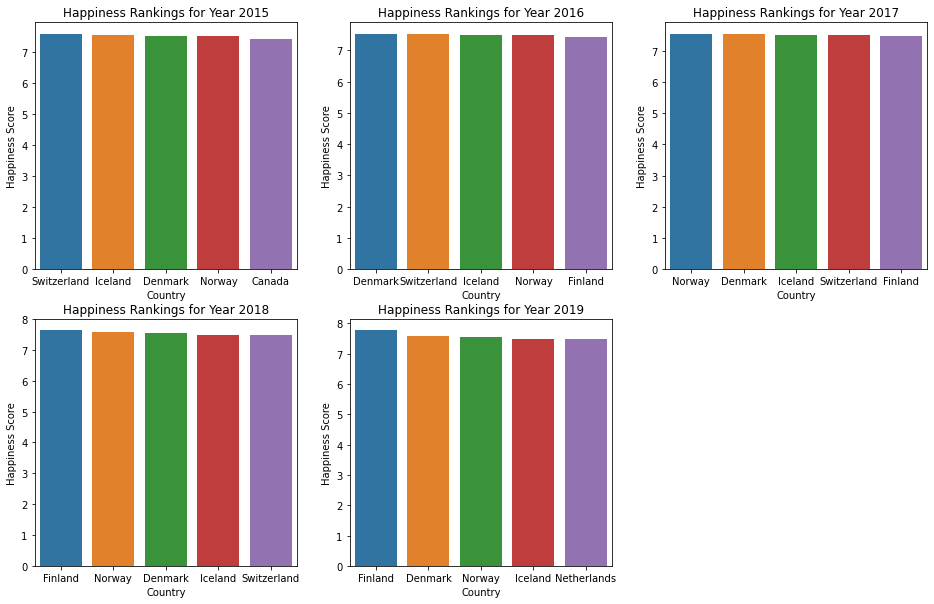

In [10]:
#Comparing the most Happiest countries in the world since 2015

plt.figure(figsize=(16, 10))
plt.subplot(2,3,1)
sns.barplot(x="Country", y="Happiness Score", data =all_Data[(all_Data["Happiness Rank"]<6) & (all_Data["Year"]==2015)])
plt.title("Happiness Rankings for Year 2015")
plt.subplot(2,3,2)
sns.barplot(x="Country", y="Happiness Score", data =all_Data[(all_Data["Happiness Rank"]<6) & (all_Data["Year"]==2016)])
plt.title("Happiness Rankings for Year 2016")
plt.subplot(2,3,3)
sns.barplot(x="Country", y="Happiness Score", data =all_Data[(all_Data["Happiness Rank"]<6) & (all_Data["Year"]==2017)])
plt.title("Happiness Rankings for Year 2017")
plt.subplot(2,3,4)
sns.barplot(x="Country", y="Happiness Score", data =all_Data[(all_Data["Happiness Rank"]<6) & (all_Data["Year"]==2018)])
plt.title("Happiness Rankings for Year 2018")
plt.subplot(2,3,5)
sns.barplot(x="Country", y="Happiness Score", data =all_Data[(all_Data["Happiness Rank"]<6) & (all_Data["Year"]==2019)])
plt.title("Happiness Rankings for Year 2019")

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Which country is the happiest in the world?</center></h3> 

As we can see, the countries of Finland, Norway, Iceland and Denmark have been the top 5 most happiest countries from the year 2015 to 2019. What could be the reason of maintaining this position? Let us find out

In the year 2019, Finland has the highest happiness score.

Since the countries are given a happiness score on the basis of which they are ranked, let us find out about the attributes that may have an effect on the Happiness score

Text(0.5, 1.0, 'Regression Line on Family Support vs Happiness Score')

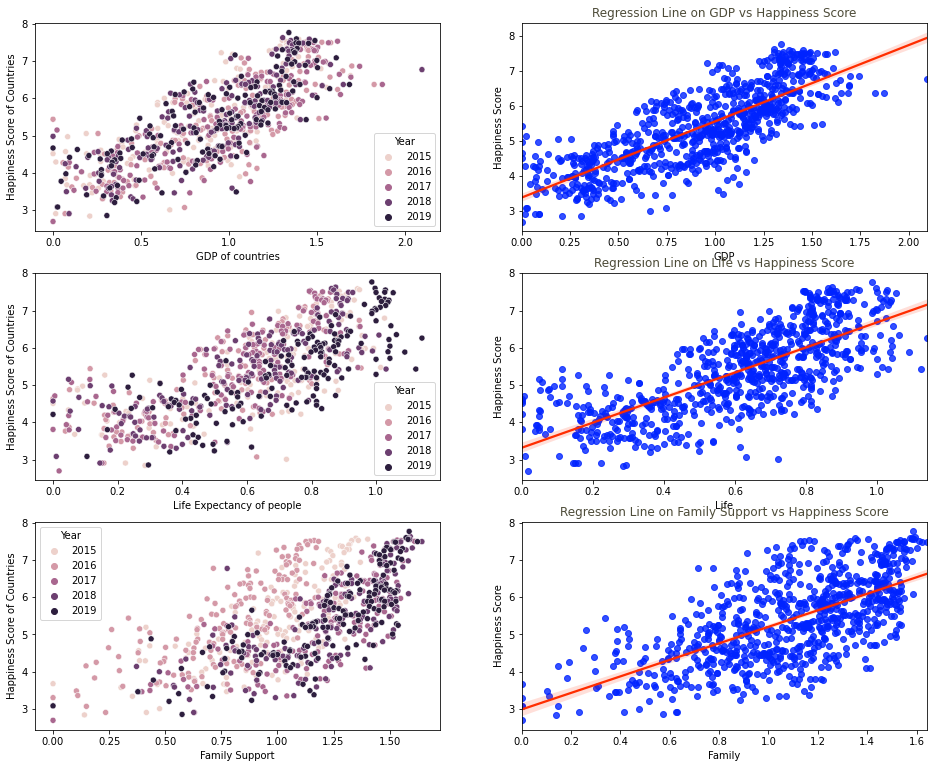

In [11]:
#Since the above countries are the most happiest countries, let us find out what is common about them
#Let us look at the relationship between the GDP and Happiness Score
plt.figure(figsize=(16, 13))


plt.subplot(3,2,1)
sns.scatterplot(x=all_Data["GDP"], y=all_Data["Happiness Score"], hue=all_Data["Year"])
plt.xlabel("GDP of countries")
plt.ylabel("Happiness Score of Countries")


plt.subplot(3,2,2)
ax = sns.regplot(x="GDP", y="Happiness Score", data=all_Data, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on GDP vs Happiness Score", color="#4e4c39")


plt.subplot(3,2,3)
sns.scatterplot(x=all_Data["Life"], y=all_Data["Happiness Score"], hue=all_Data["Year"])
plt.xlabel("Life Expectancy of people")
plt.ylabel("Happiness Score of Countries")

plt.subplot(3,2,4)
ax = sns.regplot(x="Life", y="Happiness Score", data=all_Data, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on Life vs Happiness Score", color="#4e4c39")


plt.subplot(3,2,5)
sns.scatterplot(x=all_Data["Family"], y=all_Data["Happiness Score"], hue=all_Data["Year"])
plt.xlabel("Family Support")
plt.ylabel("Happiness Score of Countries")

plt.subplot(3,2,6)
ax = sns.regplot(x="Family", y="Happiness Score", data=all_Data, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on Family Support vs Happiness Score", color="#4e4c39")

Deductions from the graphs above
1) The happiness score of countries has a linear relationship with its GDP. With increase in GDP, the happiness score of the country also 

2) The happiness score of countries has a linear relationship with the life expectancy of its people. With increase in life expectancy, the happiness score of the country also increases
 
3) The happiness score of countries has a linear relationship with the family support within its people. With increase in family support within people, the happiness score of the country also increases

4) Family support within people has also increased for majority of the countries over the years

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>What are the most important contributing factors to a nation’s happiness?</center></h3> 

Text(0.5, 1.0, 'Pearson Correlation Graph')

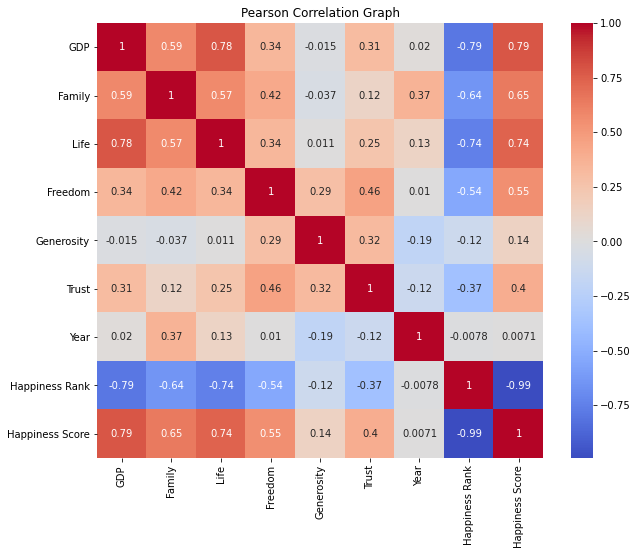

In [12]:
#To find out correlation between the attributes and the happiness ratings, we can simply use a heatmap

plt.figure(figsize=(10,8))
sns.heatmap(all_Data.corr(), annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Graph")

From the above correlation graph we can get an idea of how the attributes are realted with each other
Let us also see a correlation plot with respect to our target variable

In [13]:
all_Data.corr()["Happiness Score"]

GDP                0.789284
Family             0.648799
Life               0.742456
Freedom            0.551258
Generosity         0.137578
Trust              0.399421
Year               0.007065
Happiness Rank    -0.992066
Happiness Score    1.000000
Name: Happiness Score, dtype: float64

We can deduce that GDP, Life Expectancy, Family Support, Freedom play a major role in concluding a nations Happiness Score

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Is overall happiness increasing or decreasing?</center></h3> 

In [14]:
print(all_Data.groupby("Year")["Happiness Score"].mean())

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Happiness Score, dtype: float64


As we can see above the overall happiness mean, is increasing for the world.